In [11]:
import pandas as pd
import pylab as plt
import seaborn as sns

%matplotlib inline

In [59]:
#Aeasthetics
sns.set(font_scale=1.3)
sns.set_style("whitegrid")

# Step 1: Read data and get relevant information


Direct taxes:
 - Taxes on Income, Profits & Capital Gains
 - Taxes on Payroll & Workforce
 - Social Contributions
 - Property Taxes

Indirect taxes
 - Taxes on Goods and Services
 - Resource taxes
 - Taxes on International Trade
 - Other Taxes


In [14]:
df = pd.read_excel("Data/ICTDWIDERGRD_2018_0.xlsx",sheet_name="Merged")
df.head()

,Identifier,mergecode,Source,Country,Reg,Inc,Year,ISO,GDP,General Notes,...,Unnamed: 47,Taxes on International Trade,Unnamed: 49,Unnamed: 50,Other Taxes,Non-Tax Revenue,Unnamed: 53,Unnamed: 54,Social Contributions,Grants
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,o/w Excises,Total,o/w Import,o/w Export,NaN,Total,Resource Component,Non-Resource Component,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW1980,0.0,NaN,Aruba,3.0,4.0,1980.0,ABW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW1981,0.0,NaN,Aruba,3.0,4.0,1981.0,ABW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW1982,0.0,NaN,Aruba,3.0,4.0,1982.0,ABW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Clean data
interesting_columns = ["ISO","Year","Country","mergecode","Inc","Reg",
                       "income_tax","payroll_tax","SC","property_tax",
                      "goods_tax","resource_tax","trade_tax","other_tax"]
numbers = [7,6,3,1,5,4,
          32,39,55,40,
          44,25,48,51]

#keep the interesting columns and rename them
df.columns = range(len(df.columns))
df = df.loc[:,numbers]
df.columns = interesting_columns

#drop the first two lines (headers, no data)
df = df.dropna(subset=["ISO"])

#find out the type of data
df = df.infer_objects()

#make sure data is correct (floats)
print(df.dtypes)

#print lines
df.head()

ISO              object
Year            float64
Country          object
mergecode       float64
Inc             float64
Reg             float64
income_tax      float64
payroll_tax     float64
SC              float64
property_tax    float64
goods_tax       float64
resource_tax    float64
trade_tax       float64
other_tax       float64
dtype: object


,ISO,Year,Country,mergecode,Inc,Reg,income_tax,payroll_tax,SC,property_tax,goods_tax,resource_tax,trade_tax,other_tax
2,ABW,1980.0,Aruba,0.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,1981.0,Aruba,0.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,1982.0,Aruba,0.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABW,1983.0,Aruba,0.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ABW,1984.0,Aruba,0.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2: Clean the data and give it the right format

In [37]:
#Key: 1 = East Asia & Pacific. 2 = Europe & Central Asia.  3 = Latin America & The Caribbean. 4 = Middle East & North Africa.5 = North America. 6 = South Asia. 7 = Sub - Saharan Africa
#Key: 1 = Low Income. 2 = Lower-Middle Income. 3 = Upper-Middle Income. 4 = High Income
d_income = {1:"Low I",2:"Lower-Middle I",3:"Upper-Middle I",4:"High I"}
df["Inc"] = df["Inc"].map(d_income)
print(df["Inc"].head())

d_region = {1:"East-Asia",2:"EU_C-Asia",3:"Latin America",4:"Middle East",5:"North America",6:"South Asia",7:"Sub-sah"}
df["Reg"] = df["Reg"].map(d_region)
print(df["Reg"].head())

2    High I
3    High I
4    High I
5    High I
6    High I
Name: Inc, dtype: object
2    Latin America
3    Latin America
4    Latin America
5    Latin America
6    Latin America
Name: Reg, dtype: object


In [38]:
#Make the columns into (long format)
df_cleaned = pd.melt(df,
       id_vars=["ISO","Year","Country","mergecode","Inc","Reg"],
       value_vars=["income_tax","payroll_tax","SC","property_tax",
                      "goods_tax","resource_tax","trade_tax","other_tax"],
       var_name="tax_type",
       value_name="rate")

df_cleaned.head()

,ISO,Year,Country,mergecode,Inc,Reg,tax_type,rate
0,ABW,1980.0,Aruba,0.0,High I,Latin America,income_tax,NaN
1,ABW,1981.0,Aruba,0.0,High I,Latin America,income_tax,NaN
2,ABW,1982.0,Aruba,0.0,High I,Latin America,income_tax,NaN
3,ABW,1983.0,Aruba,0.0,High I,Latin America,income_tax,NaN
4,ABW,1984.0,Aruba,0.0,High I,Latin America,income_tax,NaN


In [50]:
#Making it into percentage
df_cleaned["rate"] *= 100

In [51]:
#Save file to disk
df_cleaned.to_csv("Data/clean_tax_data.csv",sep="\t",index=None)

# Step 3: Some stats

In [52]:
#Descriptive stats for everything
df.describe()

,Year,mergecode,income_tax,payroll_tax,SC,property_tax,goods_tax,resource_tax,trade_tax,other_tax
count,7250.000000,7212.000000,4987.000000,3747.000000,5598.000000,4260.000000,4972.000000,5313.000000,5050.000000,4748.000000
mean,1997.995034,0.394897,0.065889,0.001998,0.027430,0.005667,0.074185,0.007462,0.026861,0.004142
std,10.675100,0.488863,0.049855,0.006072,0.045150,0.007645,0.045223,0.030279,0.033555,0.006993
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-0.000023,0.000000,-0.007245,-0.015693,-0.021084
25%,1989.000000,0.000000,0.028941,0.000000,0.000000,0.000198,0.037433,0.000000,0.005475,0.000010
50%,1998.000000,0.000000,0.054490,0.000000,0.000000,0.002331,0.070021,0.000000,0.015880,0.001294
75%,2007.000000,1.000000,0.091010,0.000944,0.045491,0.008437,0.107312,0.000000,0.034989,0.005090
max,2016.000000,1.000000,0.320753,0.069463,0.192500,0.041105,0.349203,0.411959,0.361156,0.079116


In [53]:
#Tax rate for social contribution by income group
df.groupby("Inc").describe()["SC"]

,count,mean,std,min,25%,50%,75%,max
Inc,,,,,,,,
High I,1761.0,0.062881,0.055360,0.0,0.0,0.058330,0.114928,0.191725
Low I,843.0,0.000328,0.001314,0.0,0.0,0.000000,0.000000,0.010774
Lower-Middle I,1478.0,0.008350,0.022182,0.0,0.0,0.000000,0.000287,0.192500
Upper-Middle I,1481.0,0.020395,0.035042,0.0,0.0,0.000005,0.028351,0.155100


In [54]:
#Tax rate for income_tax by income group
df.groupby("Inc").describe()["income_tax"]

,count,mean,std,min,25%,50%,75%,max
Inc,,,,,,,,
High I,1676.0,0.101134,0.056950,0.000000,0.064833,0.094992,0.133016,0.320753
Low I,764.0,0.031653,0.024685,0.000131,0.016861,0.025813,0.036426,0.171284
Lower-Middle I,1222.0,0.049068,0.031610,0.000000,0.026993,0.043676,0.064868,0.272102
Upper-Middle I,1295.0,0.056594,0.036822,0.000650,0.031172,0.048565,0.072462,0.269478


In [55]:
#Tax rate for income_tax by region
df.groupby("Reg").describe()["income_tax"]

,count,mean,std,min,25%,50%,75%,max
Reg,,,,,,,,
EU_C-Asia,1408.0,0.097162,0.051274,0.007749,0.060722,0.088913,0.123342,0.316859
East-Asia,730.0,0.076785,0.054029,0.000000,0.039864,0.066064,0.096459,0.320753
Latin America,907.0,0.050267,0.032450,0.000000,0.026732,0.043743,0.067089,0.234444
Middle East,415.0,0.043098,0.038383,0.000000,0.013031,0.034309,0.061595,0.218721
North America,74.0,0.137734,0.021738,0.092753,0.119151,0.140878,0.154514,0.181716
South Asia,241.0,0.022862,0.016286,0.001660,0.012404,0.020166,0.027435,0.090895
Sub-sah,1212.0,0.046661,0.037763,0.000131,0.022623,0.034743,0.059997,0.272102


# Step 4: Produce visualization

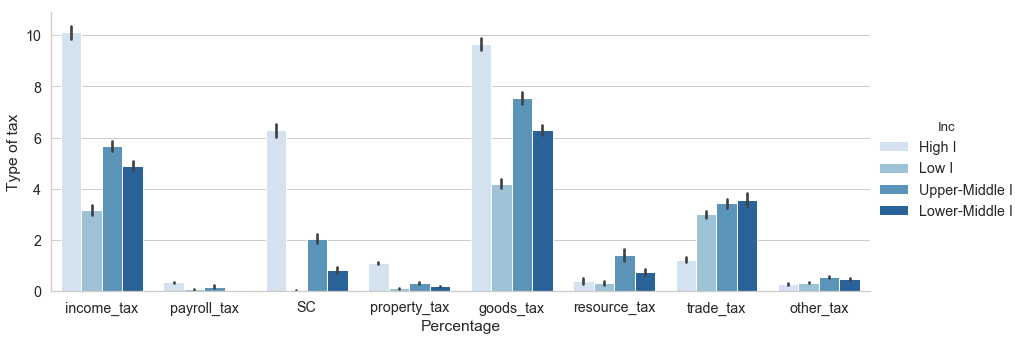

In [73]:
sns.catplot(x="tax_type",y="rate",hue="Inc",kind="bar",data=df_cleaned,palette="Blues",height=5, aspect=2.5)
plt.xlabel("Percentage")
plt.ylabel("Type of tax")
plt.savefig("Figures/tax_by_income.pdf")
plt.savefig("Figures/tax_by_income.png")

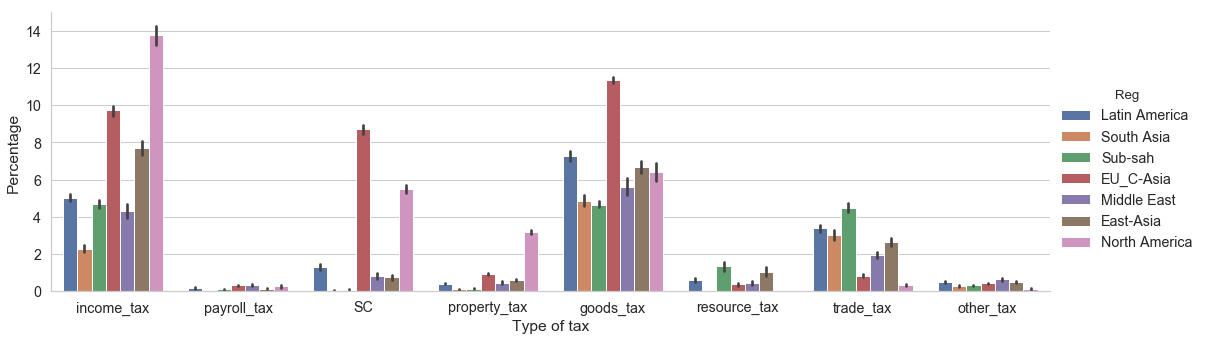

In [74]:
sns.catplot(x="tax_type",y="rate",hue="Reg",kind="bar",data=df_cleaned,height=5, aspect=3)
plt.ylabel("Percentage")
plt.xlabel("Type of tax")
plt.savefig("Figures/tax_by_region.pdf")
plt.savefig("Figures/tax_by_region.png")

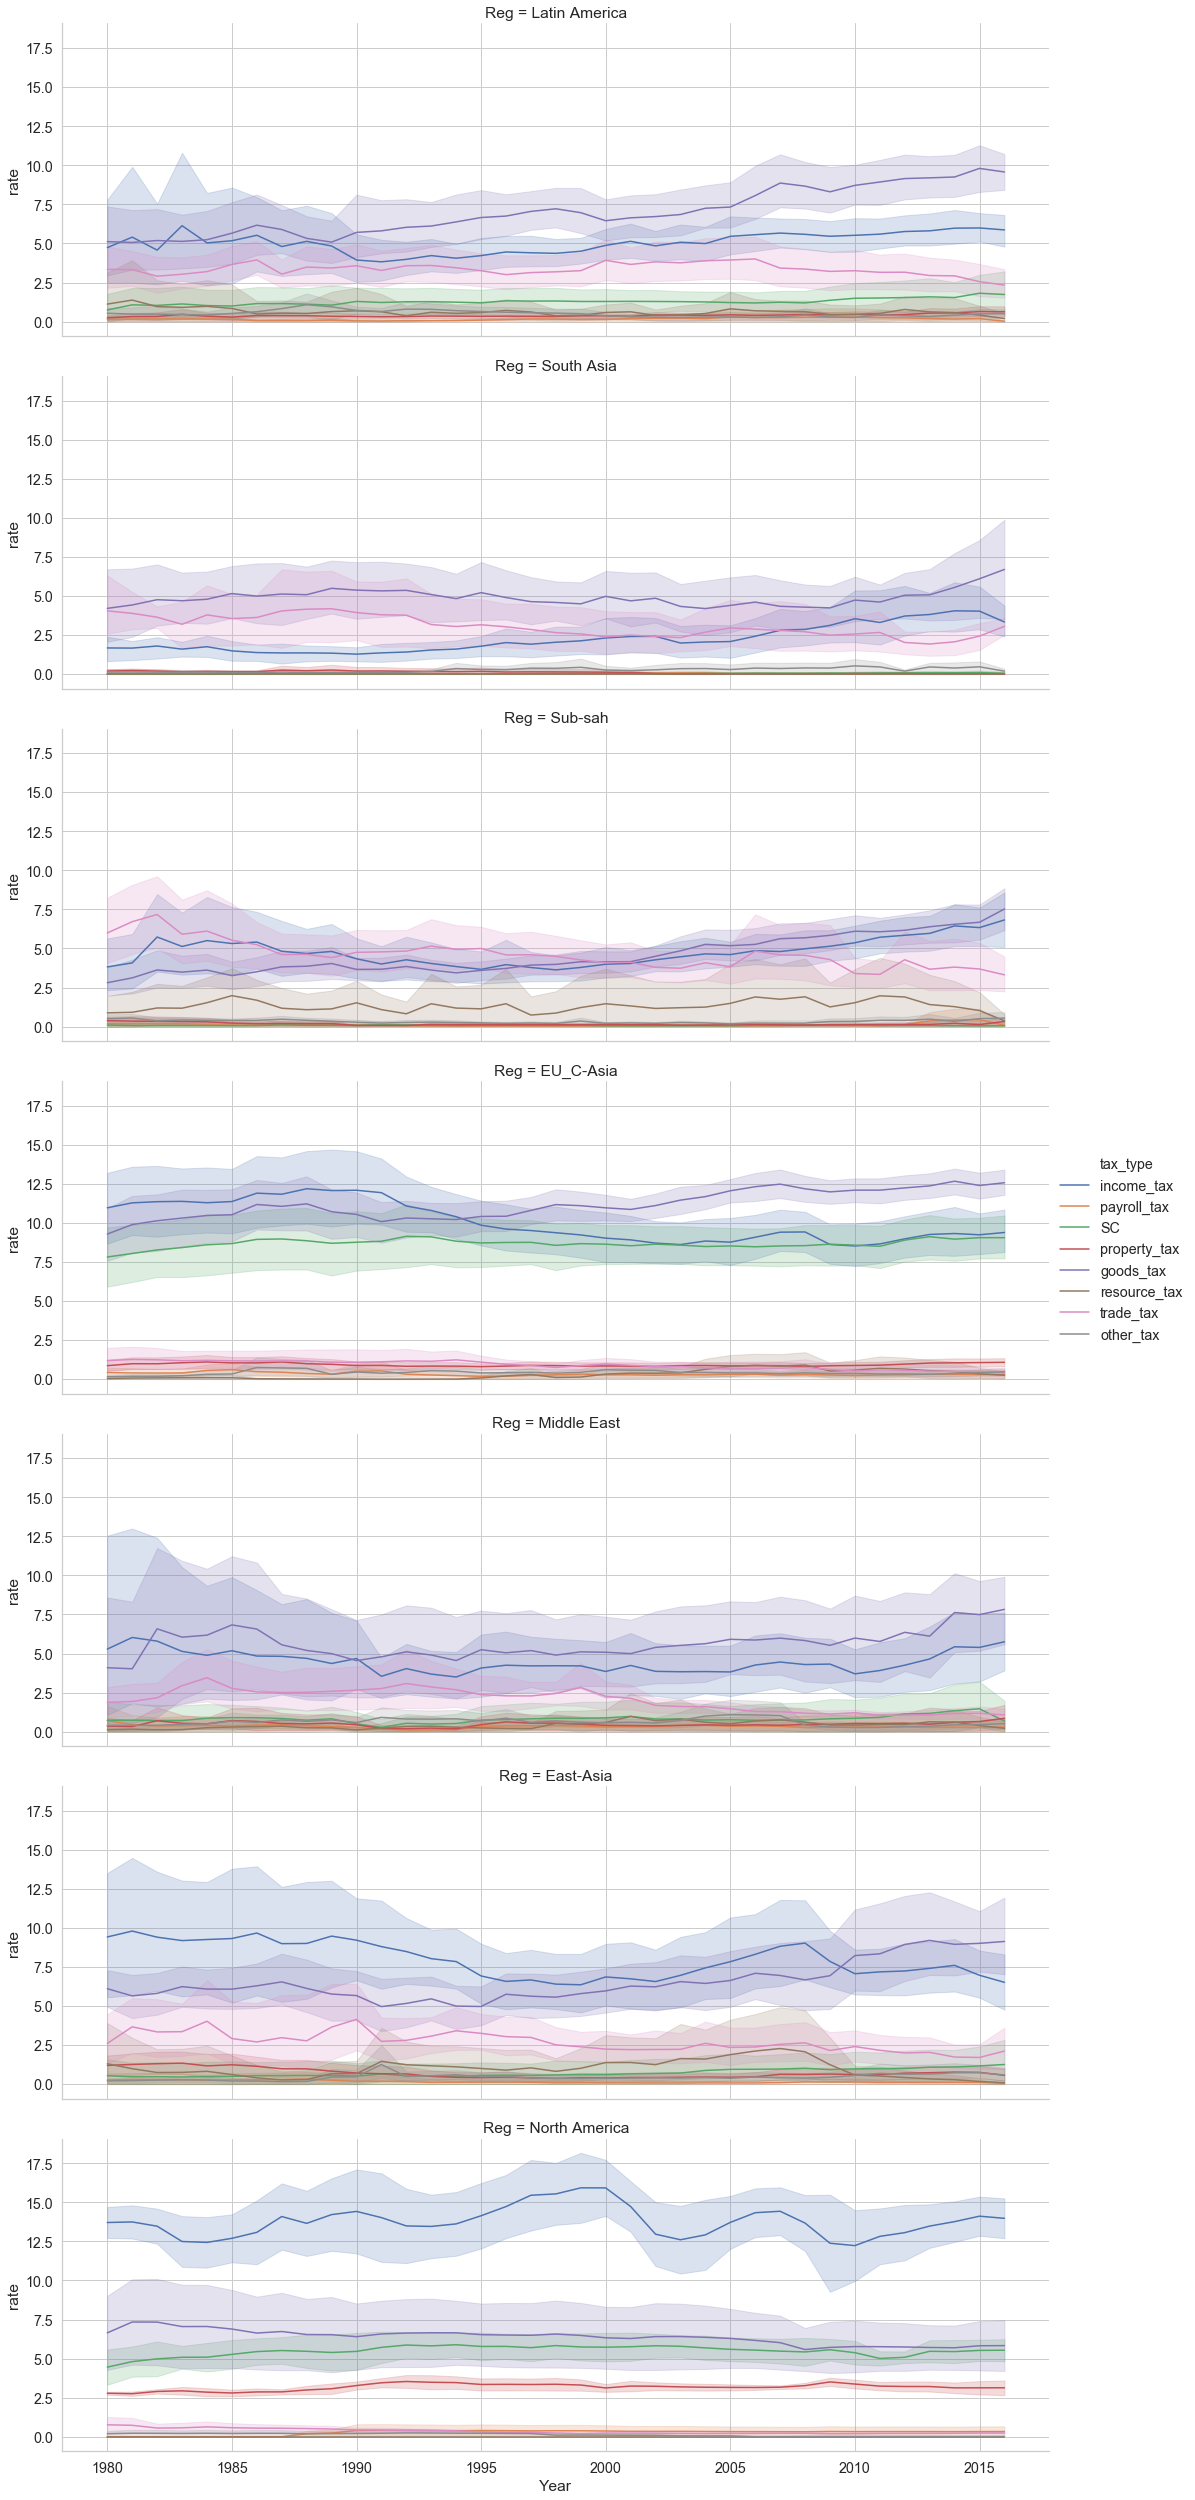

In [79]:
sns.relplot(x="Year",y="rate",hue="tax_type",row="Reg",kind="line",data=df_cleaned,height=5, aspect=3)
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.savefig("Figures/evolution_tax_by_region.pdf")
plt.savefig("Figures/evolution_tax_by_region.png")

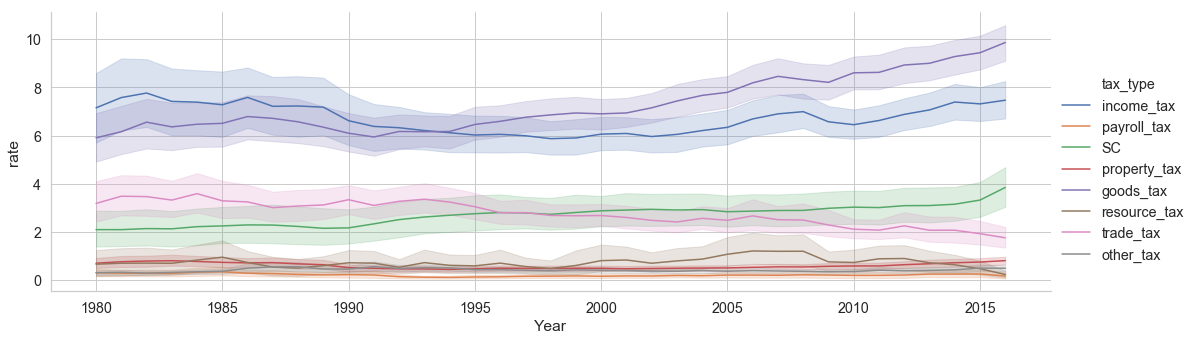

In [77]:
sns.relplot(x="Year",y="rate",hue="tax_type",kind="line",data=df_cleaned,height=5, aspect=3)
# plt.ylabel("Percentage")
# plt.xlabel("Type of tax")
# plt.savefig("Figures/tax_by_region.pdf")
# plt.savefig("Figures/tax_by_region.png")